In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("log/describe_all_gpu.csv")
df

,global_size,nx,nvx,kernel,error_mean,error_std,runtime_mean,runtime_std,cellspersec_mean,cellspersec_std,throughput_mean,throughput_std,gpu
0,2097152,128,16384,BasicRange2D,0.109176,1.423831e-17,0.382397,0.005766,21.941475,0.317590,351.063550,5.081326,1
1,4194304,256,16384,BasicRange2D,0.003372,4.449472e-19,0.736676,0.020038,22.790040,0.612513,364.640600,9.800192,1
2,8388608,512,16384,BasicRange2D,0.000105,1.390460e-20,1.372456,0.011077,24.449950,0.193918,391.199400,3.102354,1
3,16777216,1024,16384,BasicRange2D,0.000003,4.345187e-22,2.680675,0.014528,25.035025,0.134361,400.560350,2.149671,1
4,2097152,128,16384,BasicRange1D,0.109176,1.423831e-17,2.658694,0.002993,3.155165,0.003542,50.482620,0.056682,1
5,4194304,256,16384,BasicRange1D,0.003372,4.449472e-19,5.207513,0.007379,3.221739,0.004541,51.547820,0.072642,1
6,8388608,512,16384,BasicRange1D,0.000105,1.390460e-20,10.292885,0.024054,3.259980,0.007591,52.159670,0.121476,1
7,16777216,1024,16384,BasicRange1D,0.000003,4.345187e-22,19.979975,0.021031,3.358808,0.003530,53.740915,0.056457,1
8,2097152,128,16384,Hierarchical,0.109176,1.423831e-17,0.642753,0.000384,13.051070,0.007794,208.817100,0.124754,1
9,4194304,256,16384,Hierarchical,0.003372,4.449472e-19,0.817449,0.003795,20.524285,0.094377,328.388600,1.510134,1


In [15]:
KERNEL_TYPE = "Hierarchical"


same_kernel = df[df['kernel']==KERNEL_TYPE]
same_kernel

,global_size,nx,nvx,kernel,error_mean,error_std,runtime_mean,runtime_std,cellspersec_mean,cellspersec_std,throughput_mean,throughput_std,gpu
8,2097152,128,16384,Hierarchical,0.109176,1.423831e-17,0.642753,0.000384,13.051070,0.007794,208.81710,0.124754,1
9,4194304,256,16384,Hierarchical,0.003372,4.449472e-19,0.817449,0.003795,20.524285,0.094377,328.38860,1.510134,1
10,8388608,512,16384,Hierarchical,0.000105,1.390460e-20,1.044028,0.002905,32.139635,0.089418,514.23410,1.430529,1
11,16777216,1024,16384,Hierarchical,0.000003,4.345187e-22,1.913277,0.010951,35.076405,0.196997,561.22265,3.152172,1


In [10]:
sizes = same_kernel['global_size']

gbs = same_kernel['throughput_mean']
gbs_std = same_kernel['throughput_std']

errors = same_kernel['error_mean']
errors_std = same_kernel['error_std']

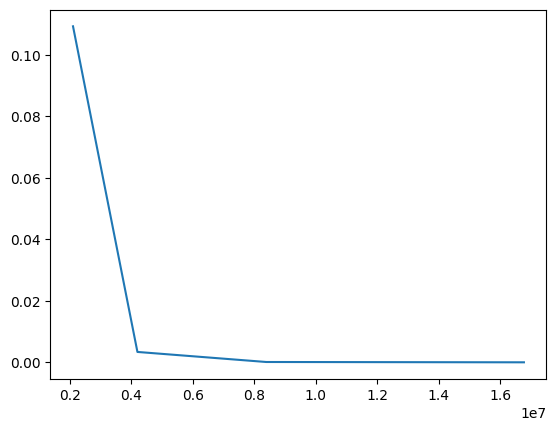

In [16]:
plt.plot(sizes, np.log(errors))